# Esplorazione Salariale nell'Analisi dei Dati

## Analisi di un Dataset sulle Retribuzioni nelle Posizioni Lavorative del Settore



## Importazione librerie e caricamento dataset


In [17]:
# Importazione librerie e caricamento dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import markdown


data = pd.read_csv('jobs_in_data.csv')

## Prime analisi sui valori del dataset

In [3]:
# prime analisi sui valori del dataset
r,c = data.shape
print("Il dataset è composto da",r,"righe e",c,"colonne.")
missing_data = data.isnull().sum()
print("Vediamo se e quanti valori nulli \n", missing_data)
unique_data = data.nunique()
print("Vediamo quanti valori unici \n", unique_data)

# calcoliamo le statistiche principali sulle colonne "salary e salary_in_usd"
statistics = data[["salary","salary_in_usd"]].describe()
print("Statistiche: \n",statistics)

Il dataset è composto da 9355 righe e 12 colonne.
Vediamo se e quanti valori nulli 
 work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64
Vediamo quanti valori unici 
 work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64
Statistiche: 
               salary  salary_in_usd
count    9355.000000    9355.000000
mean   149927.981293  150299.495564
std     63608.835387   63177.372024
min     14000.000000   15000.000000
25%    105200.000000  105700.000000
50%    143860.00

## Distribuzione degli stipendi con Media, Mediana e Quartili
### Con questo grafico viene analizzata la distribuzione media degli stipendi.
### Si evince che la media e la mediana sono molto simili e si attestano a circa 150.000 dollari annui.

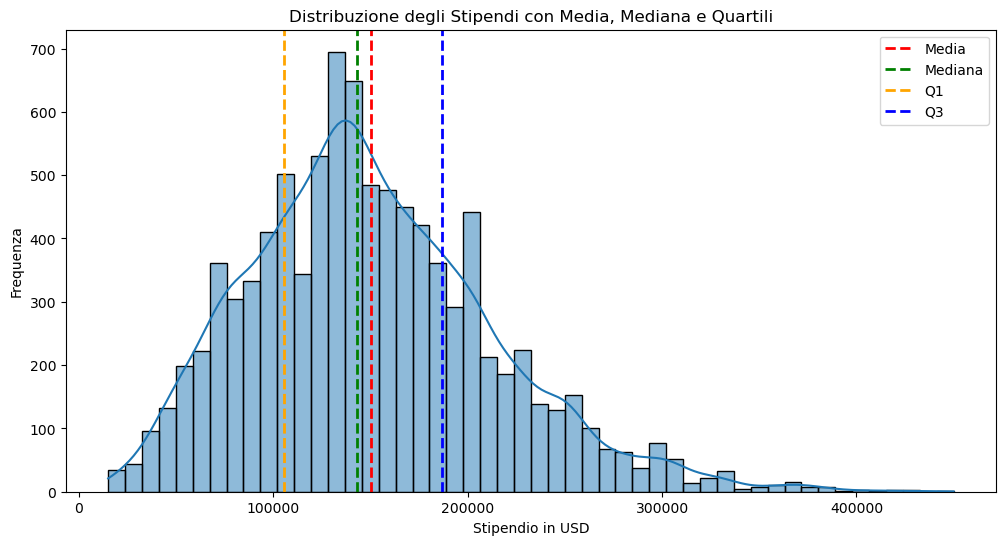

In [11]:


# Istogramma con linee verticali per media, mediana e quartili
plt.figure(figsize=(12, 6))
sns.histplot(data['salary_in_usd'], bins=50, kde=True)

# Linee verticali per la media, mediana e quartili
plt.axvline(data['salary_in_usd'].mean(), color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(data['salary_in_usd'].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(data['salary_in_usd'].quantile(0.25), color='orange', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(data['salary_in_usd'].quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='Q3')

plt.title('Distribuzione degli Stipendi con Media, Mediana e Quartili')
plt.xlabel('Stipendio in USD')
plt.ylabel('Frequenza')
plt.legend()
plt.show()


## Distribuzione delle Posizioni Lavorative
### Il grafico a barre offre una visione immediata della distribuzione delle diverse categorie di lavoro nel dataset. Notiamo che la categoria "Data Science and Research" presenta il numero più alto di dipendenti, mentre "Cloud and Database" è quella con il numero più basso. Questa analisi ci permette di identificare chiaramente le differenze quantitative tra le varie categorie di lavoro rappresentate nei dati.

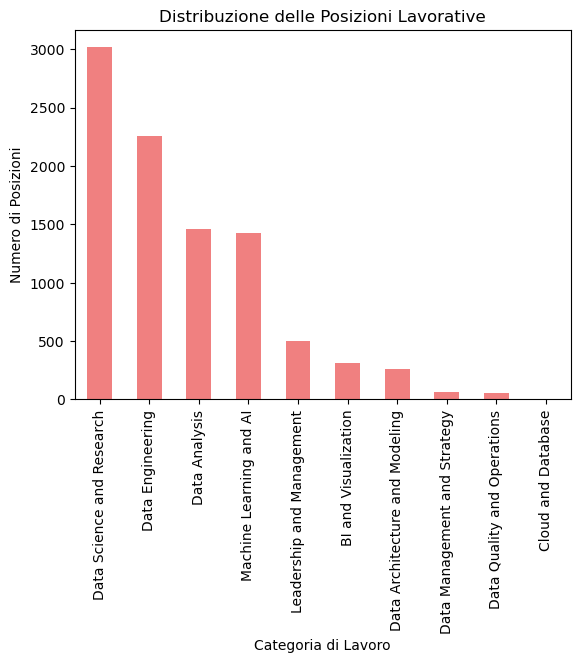

In [6]:
# Distribuzione delle posizioni di lavoro 
job_category_distribution = data['job_category'].value_counts()
job_category_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribuzione delle Posizioni Lavorative')
plt.xlabel('Categoria di Lavoro')
plt.ylabel('Numero di Posizioni')
plt.show()


## Stipendio Medio per Categoria di Lavoro
### Questo codice crea un grafico a barre che mostra lo stipendio medio per categoria di lavoro. Il grafico è generato utilizzando la libreria Seaborn insieme a Matplotlib per il layout. La variabile "data" contiene i dati utilizzati per generare il grafico.
### La dimensione del grafico è impostata su 12x6 pollici utilizzando plt.figure(figsize=(12, 6)).
### La funzione sns.barplot() viene utilizzata per creare il grafico a barre. La variabile "x" specifica la colonna contenente le categorie di lavoro, mentre la variabile "y" specifica la colonna contenente gli stipendi in dollari degli Stati Uniti. L'argomento "errwidth=0" rimuove la visualizzazione delle barre di errore.
### Le istruzioni plt.title(), plt.xlabel() e plt.ylabel() vengono utilizzate per aggiungere il titolo, le etichette degli assi x e y al grafico.
### Infine, plt.xticks(rotation=90) viene utilizzato per ruotare le etichette delle categorie di lavoro sull'asse x di 90 gradi 

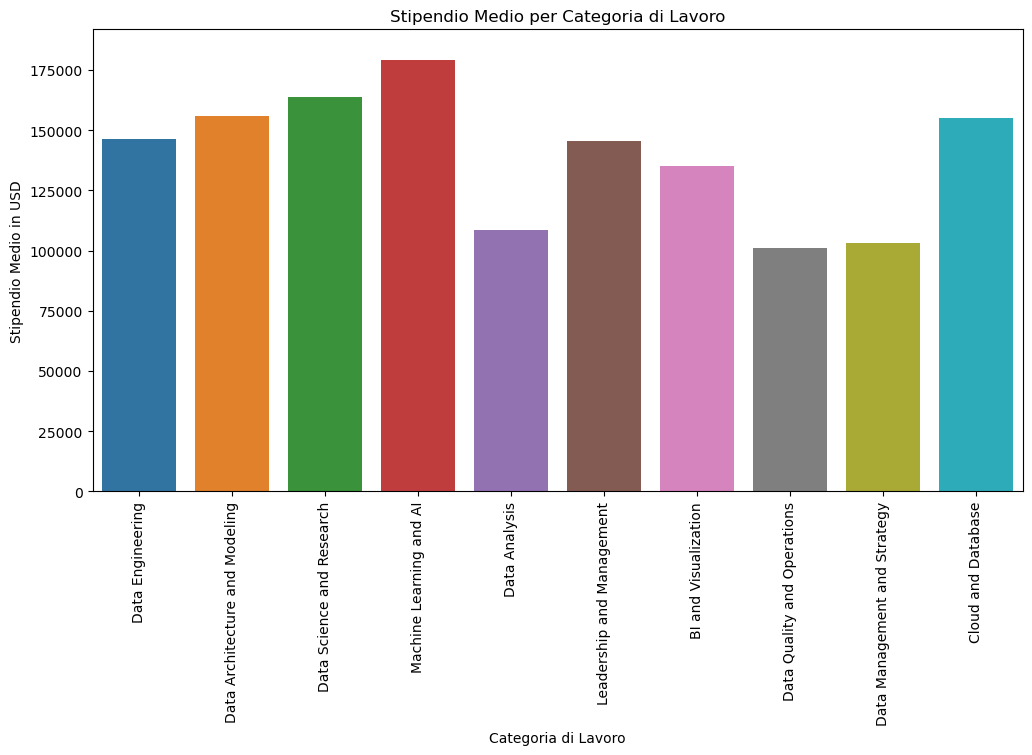

In [8]:
# Stipendio medio per categoria di lavoro
plt.figure(figsize=(12, 6))
sns.barplot(x='job_category', y='salary_in_usd',errwidth=0, data=data)
plt.title('Stipendio Medio per Categoria di Lavoro')
plt.xlabel('Categoria di Lavoro')
plt.ylabel('Stipendio Medio in USD')
plt.xticks(rotation=90)
plt.show()


## Distribuzione percentuale delle diverse categorie di esperienza lavorativa. 
### Dalle percentuali emerge che la categoria "Senior" è la più comune, 
### rappresentando una percentuale significativamente più alta rispetto alla categoria "Executive",
### che costituisce solo il 3%.

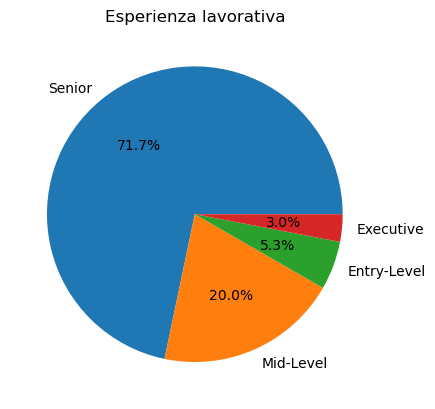

I valori sono:
 experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64


In [88]:
# percentuale esperienza del lavoro su un grafico a torta
plt.pie(data["experience_level"].value_counts(), 
        labels=["Senior","Mid-Level","Entry-Level","Executive"], #indicizzazione categorie
        autopct="%1.1f%%") #trasformazione valore in %
plt.title("Esperienza lavorativa")
plt.show()
print("I valori sono:\n",data["experience_level"].value_counts()) #valori numerici

## Distribuzione salariale 
### Il diagramma a violino evidenzia la densità della distribuzione salariale e offre una panoramica delle caratteristiche statistiche, come la mediana e i quartili per ciascuna categoria di ambiente di lavoro. Notiamo che la categoria "Hybrid" presenta un'ampiezza maggiore, indicando una maggiore variabilità salariale rispetto agli altri ambienti di lavoro, anche se con un range complessivamente più basso

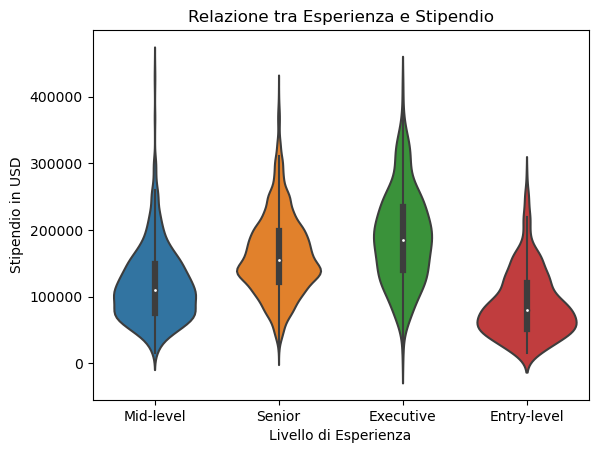

In [89]:
# diagramma a violino per la relazione tra esperienza e stipendio
sns.violinplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Relazione tra Esperienza e Stipendio')
plt.xlabel('Livello di Esperienza')
plt.ylabel('Stipendio in USD')
plt.show()


## Dipendenti divisi per Ambiente di Lavoro
### Il grafico a barre rappresenta il numero di dipendenti divisi per ambiente di lavoro. Sull'asse delle y viene rappresentato il numero di dipendenti, con un valore massimo di 6000. Sull'asse delle x vengono rappresentati i tre ambienti di lavoro: Hybrid, In person e Remote.
### Dal grafico possiamo notare che l'ambiente di lavoro In person ha il massimo numero di dipendenti, con un valore tra i 6000 e 5000. L'ambiente di lavoro Remote e Hybrid hanno entrambi un numero inferiore di dipendenti, con Remote che si attesta tra i 4000 e 3000, mentre Hybrid sta al di sotto dei 1000 dipendenti.
### Questo grafico può essere utile per visualizzare la distribuzione del numero di dipendenti in base all'ambiente di lavoro e per confrontare l'effetto che diversi ambienti possono avere sul numero di dipendenti.

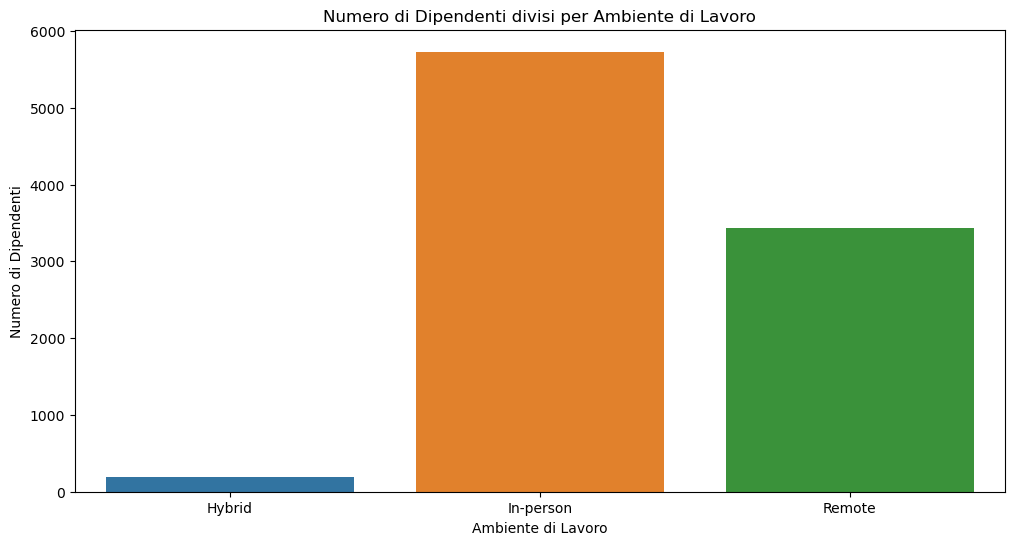

In [10]:
# Grafico a barre che conta il numero di dipendenti divisi per ambiente di lavoro
plt.figure(figsize=(12, 6))
sns.countplot(x='work_setting', data=data, )
plt.title('Numero di Dipendenti divisi per Ambiente di Lavoro')
plt.xlabel('Ambiente di Lavoro')
plt.ylabel('Numero di Dipendenti')
plt.show()


## relazione tra esperienza e stipendio
### Analisi dettagliata sui livelli di esperienza ,abbiamo fatto un grafico a violino per vedere la relazione tra livello di esperienza  in USD :"mid-level" è il livello con lo stipendio pui alto mentre "executive viene in seconda posizione e "Entry-level ha il salario piu basso

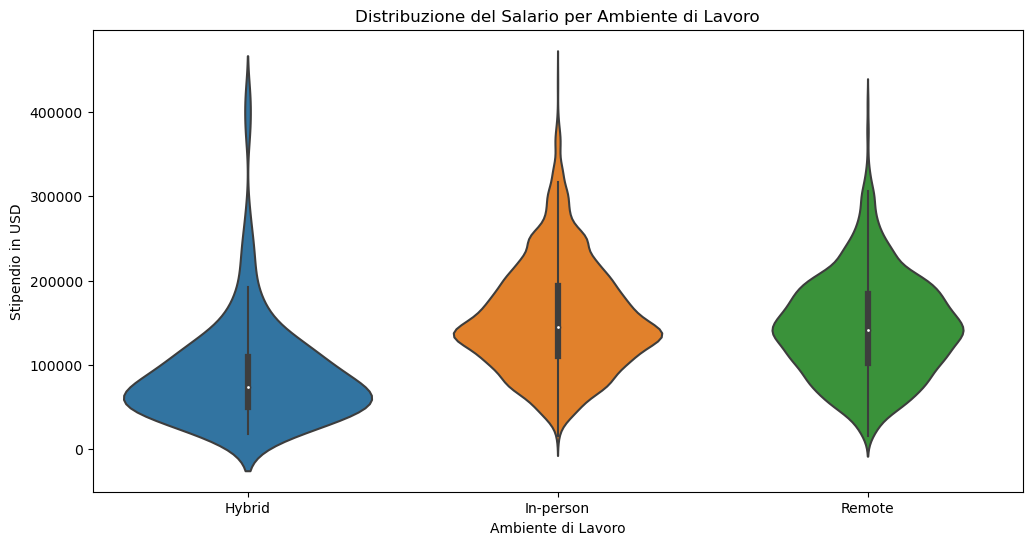

In [46]:
# Diagramma a violino del salario in base all'ambiente di lavoro
plt.figure(figsize=(12, 6))
sns.violinplot(x='work_setting', y='salary_in_usd', data=data)
plt.title('Distribuzione del Salario per Ambiente di Lavoro')
plt.xlabel('Ambiente di Lavoro')
plt.ylabel('Stipendio in USD')
plt.show()


## Numero di dipendenti per categoria (2022 v 2023)
### Il grafico permette un confronto visivo del numero di dipendenti nelle diverse categorie di lavoro tra gli anni 2022 e 2023. Si nota chiaramente che la categoria "Data Science and Research" ha registrato un notevole incremento nell'anno successivo, mentre le categorie "Data Management" e "Data Quality" mostrano variazioni minime, risultando quasi invariate.

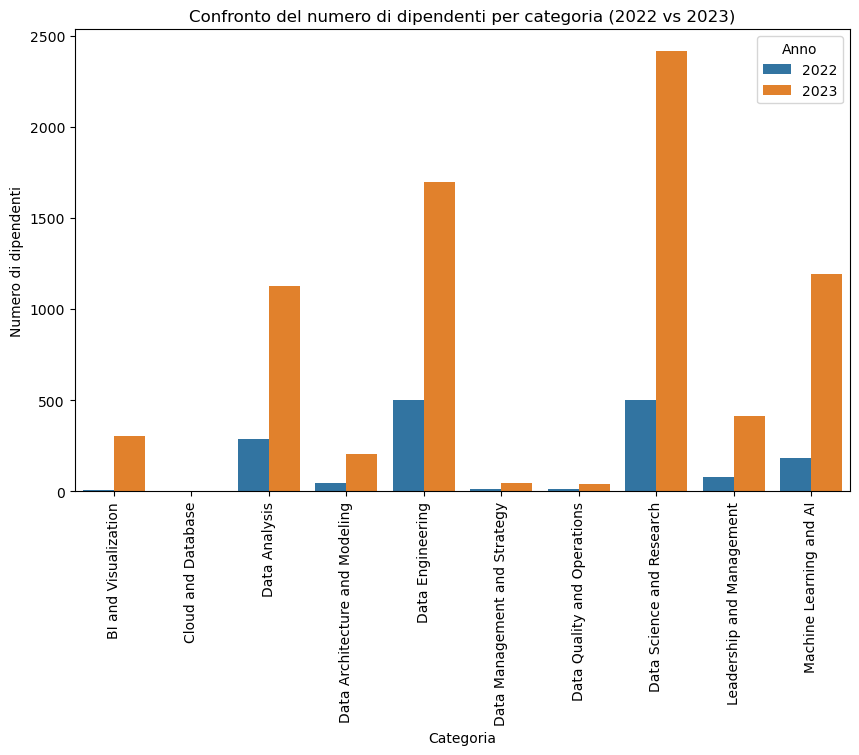

In [47]:
# considera solo gli 2022 e 2023
data_2022_2023 = data[data['work_year'].isin([2022, 2023])]

# Plot del grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x='job_category', y='count', hue='work_year', data=data_2022_2023.groupby(['job_category', 'work_year']).size().reset_index(name='count'))
plt.title('Confronto del numero di dipendenti per categoria (2022 vs 2023)')
plt.xlabel('Categoria')
plt.ylabel('Numero di dipendenti')
plt.legend(title='Anno')
plt.xticks(rotation=90)
plt.show()


## Confronto dell'Ambiente di Lavoro tra il 2022 e il 2023
### Dal grafico emerge che in entrambi gli anni ci sono stati lo stesso numero di dipendenti Hybrid, mentre i dipendenti in presenza e da remoto hanno avuto un enorme incremento nel 2022 rispetto al 2023.

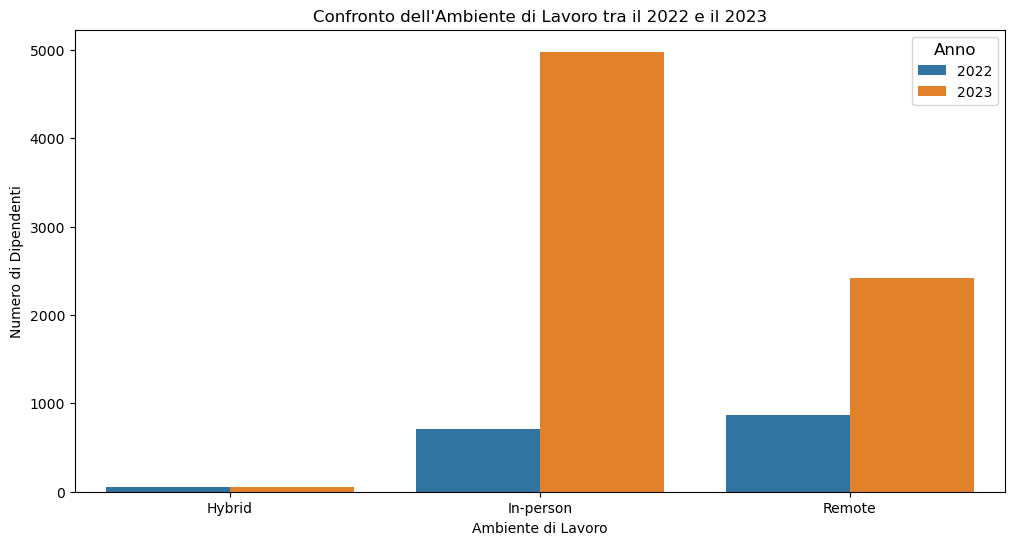

In [13]:
# considera solo gli anni 2022 e 2023
data_2022_2023 = data[data['work_year'].isin([2022, 2023])]

# Calcola il numero di dipendenti in base all'ambiente di lavoro diviso per anno
work_setting_counts = data_2022_2023.groupby(['work_year', 'work_setting']).size().reset_index(name='count')

# Grafico a barre raggruppato per confrontare gli ambienti di lavoro tra il 2022 e il 2023
plt.figure(figsize=(12, 6))
sns.barplot(x='work_setting', y='count', hue='work_year', data=work_setting_counts)
plt.title('Confronto dell\'Ambiente di Lavoro tra il 2022 e il 2023')
plt.xlabel('Ambiente di Lavoro')
plt.ylabel('Numero di Dipendenti')
plt.legend(title='Anno', title_fontsize='12')
plt.show()


## Medie degli Stipendi per Anno 2022 vs 2023
### Il codice seleziona solo i dati degli anni 2022 e 2023 per la colonna 'work_year' e calcola la media degli stipendi per ogni anno. Successivamente, crea un grafico a barre utilizzando la libreria seaborn per mostrare le medie degli stipendi per i due anni. Il grafico mostra sull'asse x gli anni 2022 e 2023 e sull'asse y gli stipendi medi in USD. Il titolo del grafico è "Confronto delle Medie degli Stipendi per Anno (2022 vs 2023)" e le etichette degli assi sono "Anno" e "Stipendio Medio in USD". Questo grafico a barre aiuta a confrontare le medie degli stipendi tra i due anni e valutare eventuali variazioni significative

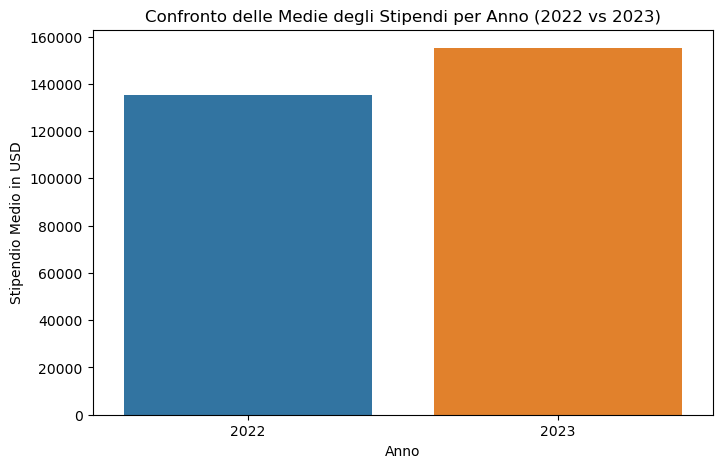

In [14]:
# considera solo gli anni 2022 e 2023
data_2022_2023 = data[data['work_year'].isin([2022, 2023])]

# Calcola la media degli stipendi per anno
media_salario_per_anno = data_2022_2023.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Grafico a barre per confrontare le medie degli stipendi tra il 2022 e il 2023
plt.figure(figsize=(8, 5))
sns.barplot(x='work_year', y='salary_in_usd', data=media_salario_per_anno)
plt.title('Confronto delle Medie degli Stipendi per Anno (2022 vs 2023)')
plt.xlabel('Anno')
plt.ylabel('Stipendio Medio in USD')
plt.show()


## Confronto del numero di dipendenti per categoria (2022vs 2023)
### Questo codice filtra i dati per considerare solo gli anni 2022 e 2023 nel dataset 'data'. Successivamente, viene creato un grafico a barre utilizzando il metodo barplot di Seaborn. L'asse x del grafico rappresenta le categorie di lavoro, l'asse y rappresenta il conteggio del numero di dipendenti e le barre sono colorate in base all'anno di lavoro. Il grafico viene titolato "Confronto del numero di dipendenti per categoria (2022 vs 2023)" e sono aggiunti etichette per gli assi x e y. Inoltre, viene aggiunto un legenda con il titolo "Anno" per distinguere il colore delle barre, e gli assi x vengono ruotati di 90 gradi per rendere le etichette più leggibili.

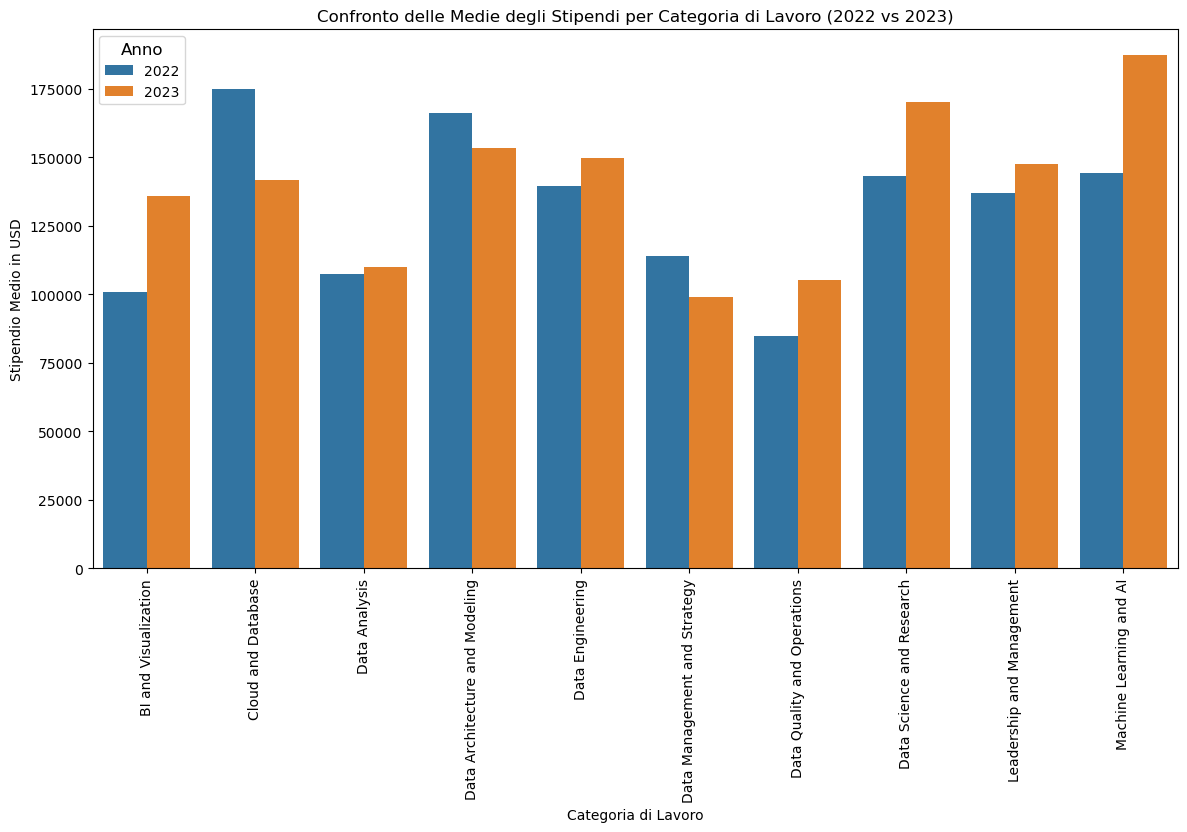

In [42]:

# considera solo gli 2022 e 2023
data_2022_2023 = data[data['work_year'].isin([2022, 2023])]

# Calcola la media degli stipendi per categoria di lavoro e anno
media_salario_categoria_per_anno = data_2022_2023.groupby(['job_category', 'work_year'])['salary_in_usd'].mean().reset_index()

# Grafico a barre raggruppato per confrontare le medie degli stipendi tra il 2022 e il 2023
plt.figure(figsize=(14, 7))
sns.barplot(x='job_category', y='salary_in_usd', hue='work_year', data=media_salario_categoria_per_anno)
plt.title('Confronto delle Medie degli Stipendi per Categoria di Lavoro (2022 vs 2023)')
plt.xlabel('Categoria di Lavoro')
plt.ylabel('Stipendio Medio in USD')
plt.xticks(rotation=90)
plt.legend(title='Anno', title_fontsize='12')
plt.show()


## Numero di dipendenti che lavorano all'estero suddivisi per categoria di lavoro.
### Questo grafico fornisce una rappresentazione visiva del numero di dipendenti che lavorano all'estero nelle diverse categorie di lavoro, consentendo di identificare facilmente quali settori o posizioni potrebbero avere una maggiore presenza di dipendenti internazionali.

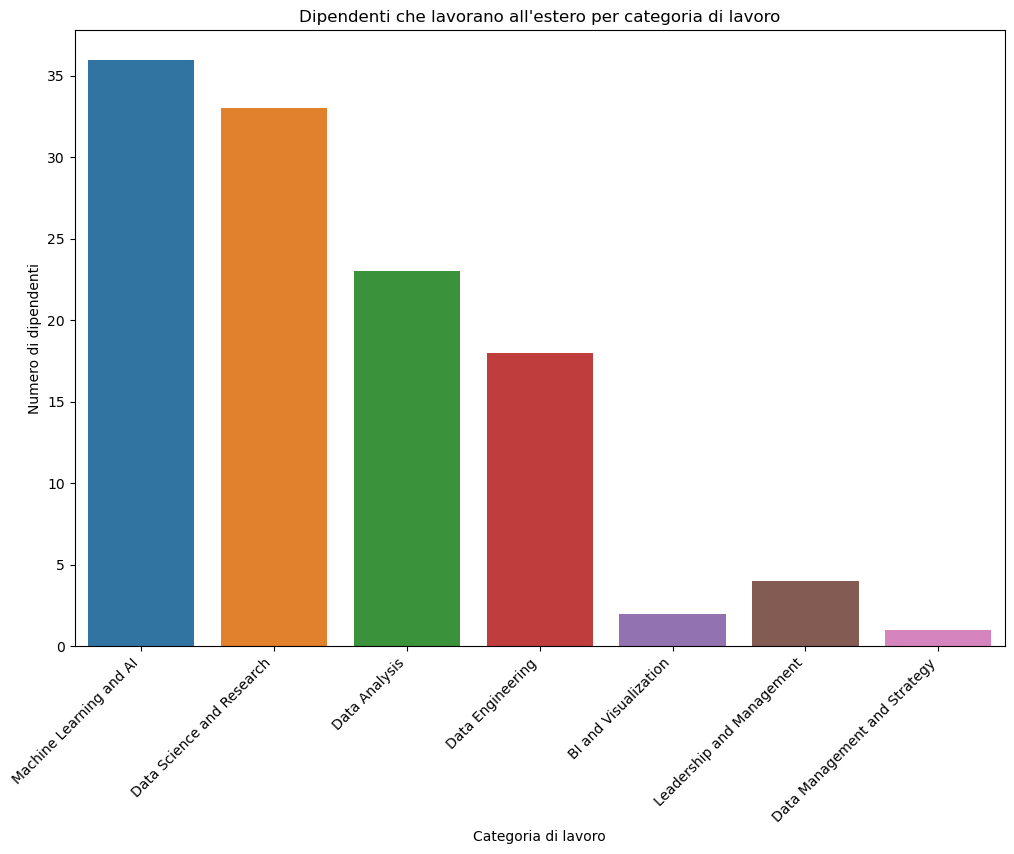

In [19]:

# verifica se il dipendente lavora in un paese diverso da quello dell'azienda
data['works_abroad'] = (data['employee_residence'] != data['company_location']).astype(int)

# mostra solo i dipendenti che lavorano all'estero
abroad_data = data[data['works_abroad'] == 1]

# grafico a barre impilato
plt.figure(figsize=(12, 8))
sns.countplot(x='job_category', data=abroad_data)
plt.title('Dipendenti che lavorano all\'estero per categoria di lavoro')
plt.xlabel('Categoria di lavoro')
plt.ylabel('Numero di dipendenti')
plt.xticks(rotation=45, ha='right')
plt.show()


## Salario medio in base al livello di esperienza e posizione lavorativa
### questo grafico ci mette in evidenza il rapporto tra il salario medio per categoria di lavoro e livello di esperienza.possiamo vedere le variazioni per del salario di ogni livello di esperienza per ogni categoria

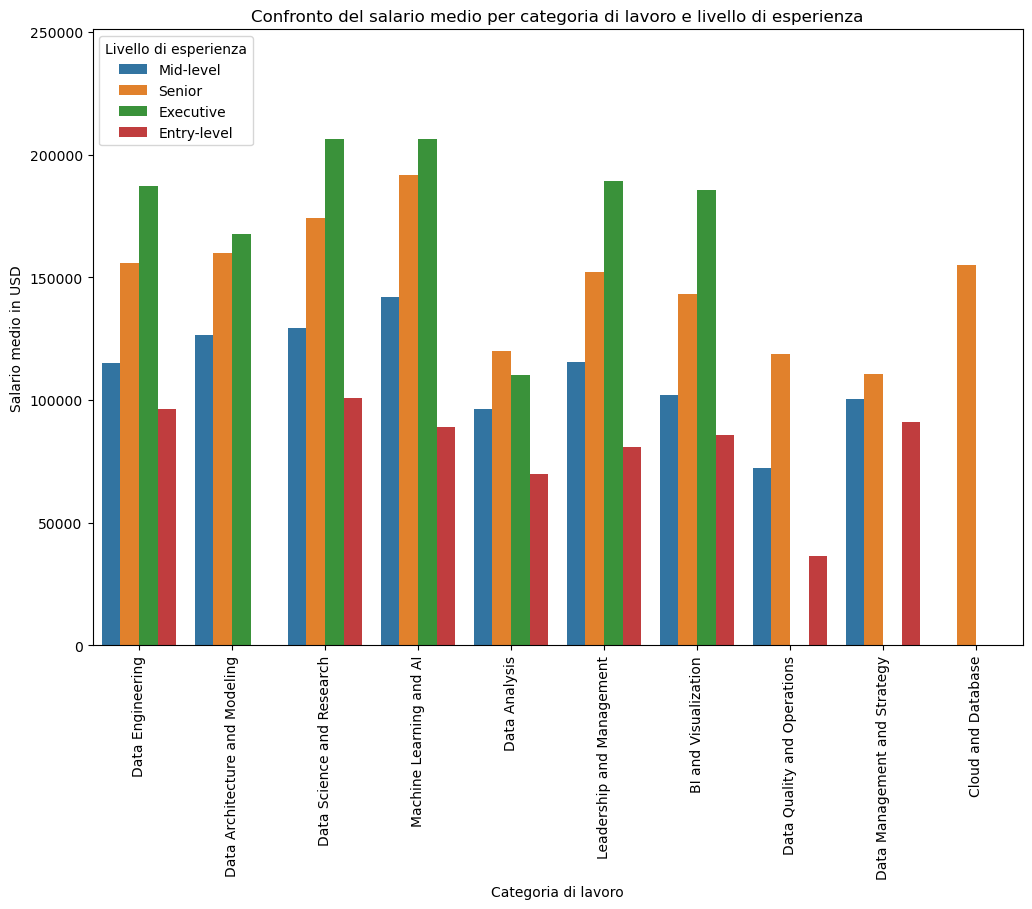

In [48]:

# grafico a barre di confronto per il salario medio in base al livello di esperienza
plt.figure(figsize=(12, 8))
sns.barplot(x='job_category', y='salary_in_usd', hue='experience_level', data=data, errwidth=0, estimator='mean')
plt.title('Confronto del salario medio per categoria di lavoro e livello di esperienza')
plt.xlabel('Categoria di lavoro')
plt.ylabel('Salario medio in USD')
plt.xticks(rotation=90)
plt.legend(title='Livello di esperienza')
plt.show()


## Analisi dettagliata sui salari dei Data Scientist negli Stati Uniti dal 2020 al 2023
### abbiamo elaborato un grafico a barre per visualizzare la tendenza della media salariale nel corso degli anni. L'analisi comprende codice per ottenere medie, mediane, quartili, percentili, massimi e minimi salariali dei diversi anni.

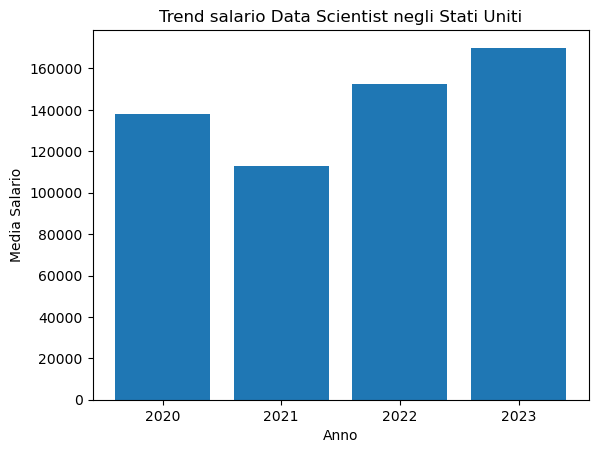

In [22]:




#data analyst salary trend over the years in united states


data_science= data[(data.job_title == "Data Scientist") & (data.company_location == "United States")]
#print(data_science.describe())


#suddivisone per anno
anno2020= data_science[(data_science.work_year == 2020)]
anno2021= data_science[(data_science.work_year == 2021)]
anno2022= data_science[(data_science.work_year == 2022)]
anno2023= data_science[(data_science.work_year == 2023)]


#Analisi anno 2023 job title "Data Scientist" 

#media salaro anno 2023 
media_salario_ds= anno2023.mean(axis=0, numeric_only= True)


#moda salario anno 2023
moda_salario_ds= anno2023.mode()

#mediane salario anno 2023
mediana_salario_ds= anno2023.median(numeric_only=True)

#quartili salario anno 2023
quartili_salario_ds= anno2023.quantile((0.25, 0.5, 0.7 ), numeric_only=True)
#print(quartili_salario_ds)

#MIN salario anno 2023
minimo_salario_ds= anno2023.min()


#MAX salario anno 2023
#massimo_salario_ds= anno2023.max(numeric_only= True)
#print(massimo_salario_ds)




#salary_year_data= data_science['salary']
#print(salary_year_data.describe())


group_valori = data_science.groupby("work_year")["salary"].mean()
anno2 = group_valori.index
salary_mean = group_valori.values
plt.bar(anno2.astype(str), salary_mean)
plt.xlabel('Anno')
plt.ylabel('Media Salario')
plt.title('Trend salario Data Scientist negli Stati Uniti')

plt.show()




## Confronto della distribuzione delle categorie di lavoro in base al tipo di impiego
### questo grafico ci permette di avere un confronto tra categoria di lavoro per ogni tipo di impiego.possiamo vedere che il tipo di impiego "full-time ha un un maggior numero di dipendenti per ogni categoria invece gli altri tipi di impiego per ogni categoria sono quasi nulli.

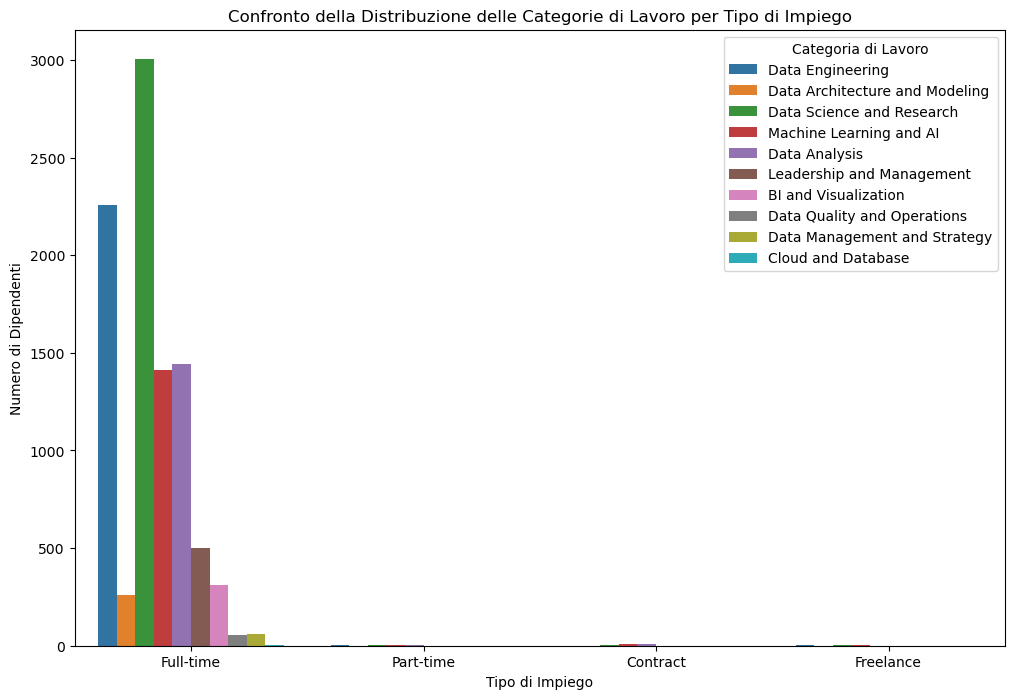

In [55]:
#Confronto della distribuzione delle categorie di lavoro in base al tipo di impiego
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='employment_type', hue='job_category')
plt.title('Confronto della Distribuzione delle Categorie di Lavoro per Tipo di Impiego')
plt.xlabel('Tipo di Impiego')
plt.ylabel('Numero di Dipendenti')
plt.legend(title='Categoria di Lavoro')
plt.show()

## Tipologia di contratto
### Il grafico rappresenta la distribuzione dei diversi tipi di contratto. Si evince chiaramente che la quasi totalità degli addetti ai lavori abbia un contratto di lavoro subordinato full-time.

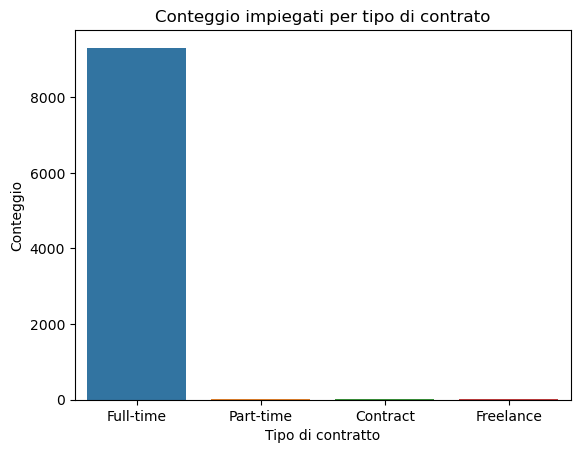

In [61]:


# conteggio impiegati per tipo di contratto
sns.countplot(x="employment_type", data=data) 
plt.xlabel("Tipo di contratto")
plt.ylabel("Conteggio")
plt.title("Conteggio impiegati per tipo di contrato")
plt.show()

## Media Salario divisa per anno
### Il grafico a barre illustra la media salariale per ogni anno rappresentato nel dataset, 
### fornendo una chiara visione della tendenza temporale degli stipendi. 
### Notiamo che nel corso degli anni vi è un incremento costante.

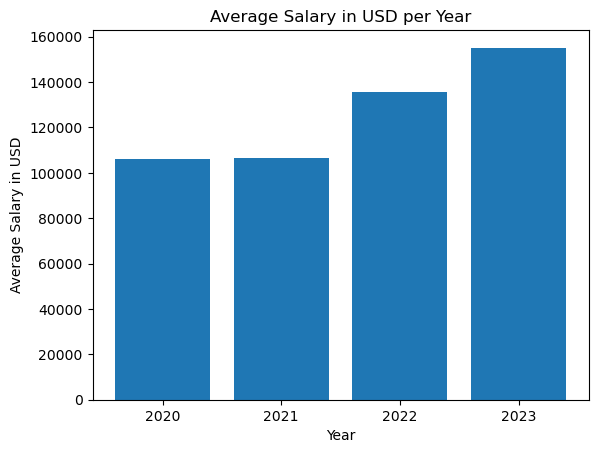

In [68]:
avg_salary_by_year = data.groupby("work_year")["salary_in_usd"].mean()
years = avg_salary_by_year.index
salaries = avg_salary_by_year.values
plt.bar(years, salaries)
plt.xlabel("Year")
plt.ylabel("Average Salary in USD")
plt.title("Average Salary in USD per Year")
plt.xticks(years)  # Imposta gli anni come tick sull'asse x
plt.show()

## Media Salario per Nazione
### Il grafico offre una chiara visualizzazione della media salariale per ciascuna nazione nel dataset. 
### I salari sono presentati in ordine decrescente, evidenziando le nazioni con
### una media salariale superiore rispetto alle altre.
### In particolare, notiamo che il "Qatar" occupa la posizione più alta con uno stipendio medio più elevato,
### mentre l'"Indonesia" si colloca all'ultima posizione. 

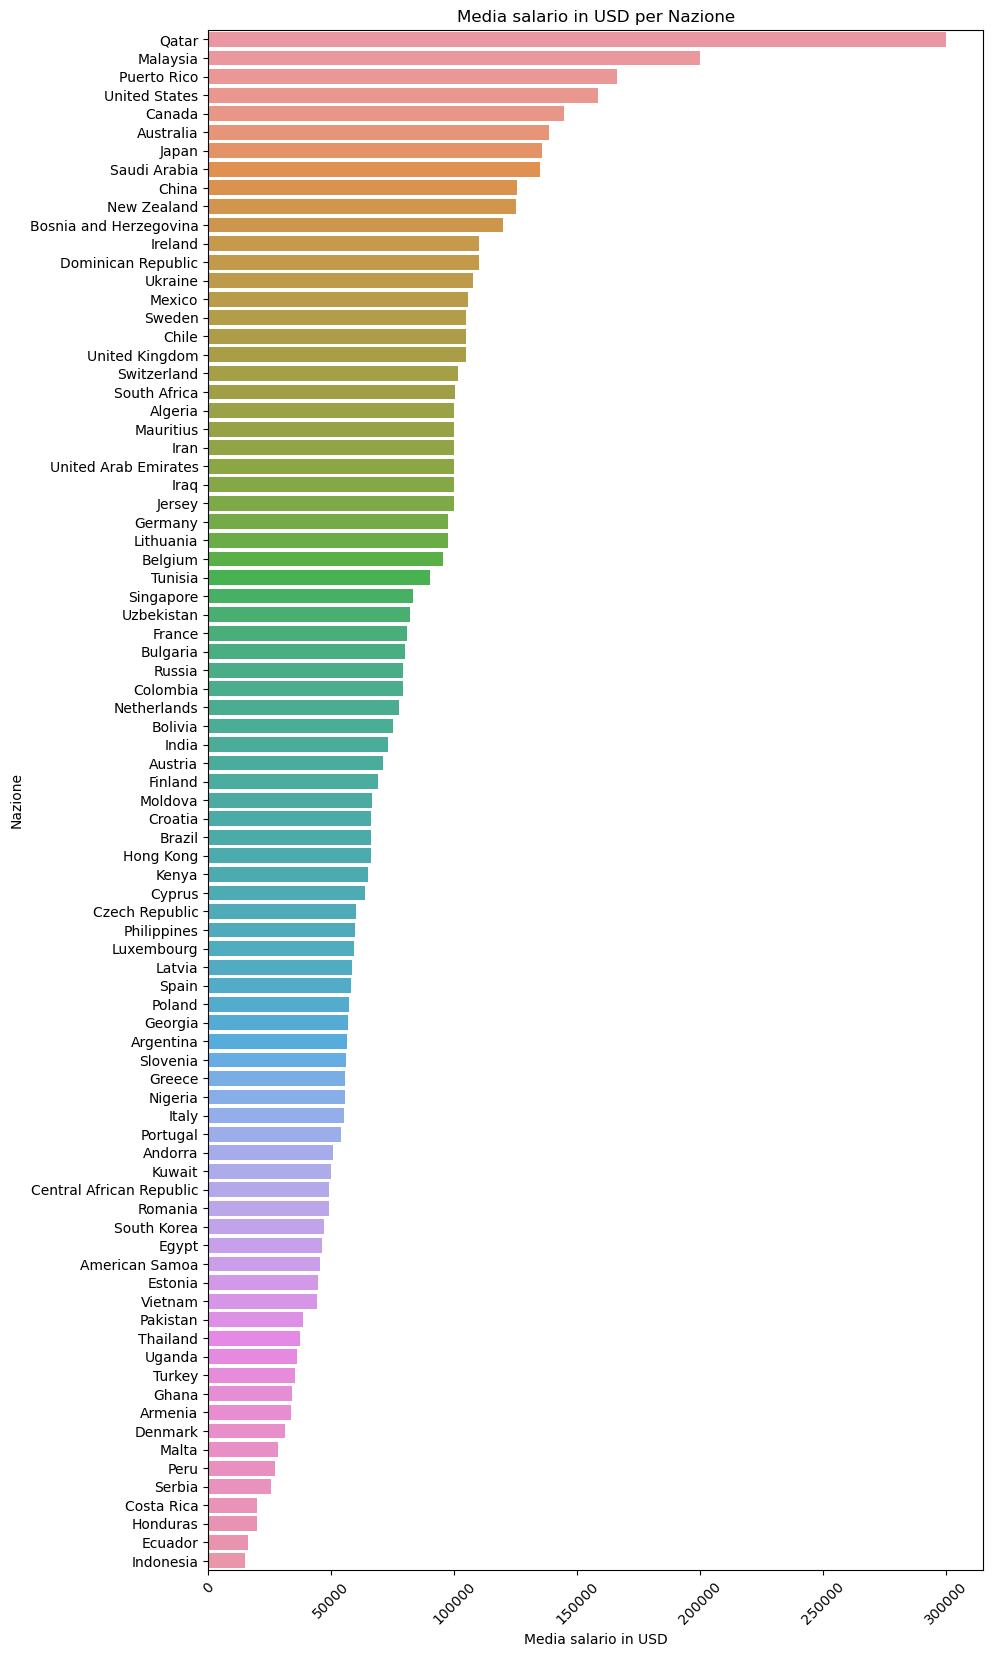

In [69]:
#media salario per nazione
#raggruppa la media dei salari per ogni nazione, ordinandoli in modo decrescente
average_salay_by_country = data.groupby("employee_residence")["salary_in_usd"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,20))
sns.barplot(x=average_salay_by_country, y=average_salay_by_country.index)
plt.tick_params(axis='x', labelrotation=45)
plt.xlabel("Media salario in USD")
plt.ylabel("Nazione")
plt.title("Media salario in USD per Nazione")
plt.show()